### Závěrečný projekt - modul Python

V tomto projektu proběhla analýza dat ze webové stránky `www.sreality.cz`, kde byla  získána  aktuální nabídka bytů ve Zlíně.
Projekt se dělí na 3 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` byly získány všechny aktuální inzerce bytů v daném městě. 
- Byly získány  **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (ulice + město)`
2. Datová analýza - ETL proces
- V první fázi byl proveden processing dat tak, aby obsahoval příslušné datové typy, nenulové hodnoty a podobně.
- Zprocesovaná a vyčištěná data byla vyexporotvána do `.csv` souboru.
3. Datová analýza
- V třetí části byl do dataframe nahrán vyexportovaný `.csv` soubor s vyscrapovanými daty.
- V této fázi byla provedna analýza dat, kde byly zodpovězeny tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)?`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Jaká je minimální a maximální cena inzerce pro každou kompozici bytu? Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


### WebScraping

In [135]:
def ziskej_cenu_bytu(text: str) -> tuple[str, int]:
    cena = text.split()[2]
    metry = text.split()[3]

    return cena, metry

from bs4 import BeautifulSoup
import requests

strana = 1
byty_data = []

while True:
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/zlin?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')
    
    byty = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q') #Zde hledám byty na stránce, společné znaky.
    
    for byt in byty:
        odkaz = byt.find('a', 'MuiTypography-root MuiTypography-inherit MuiLink-root MuiLink-underlineAlways css-1c7vz4z')['href']
        #Ačkovy tag mi našel konkrétní detail bytu.
        info_byty = byt.find('div', 'MuiBox-root css-n6y9a7') #Div tag mi našel souhrnné informace (kompo,cena, ulice)
        if info_byty is None:
            continue
        byt_detail = info_byty.find('p',  'MuiTypography-root MuiTypography-body1 css-13ztabn').text #Kompozice
        rozmery, kompozice = ziskej_cenu_bytu(byt_detail)
        ulice_kompozice = info_byty.findAll('p', 'MuiTypography-root MuiTypography-body1 css-13ztabn') #Ulice
        ulice = ulice_kompozice[1].text #Ulice_kompozice má stejný tag jako ulice, je zapotřebí indexovat.
        cena = info_byty.find('p', 'MuiTypography-root MuiTypography-body1 css-1ndcg2e').text #Cena
        print(cena)
        byt_objekt = {
            'Cena': cena,
            'Kompozice bytu': kompozice,
            'Rozměry bytu': rozmery,
            'Lokace': ulice
        }
    
        byty_data.append(byt_objekt)
        
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text
        
    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break        
            
    strana += 1
        
    print(f'Scrapuju stránku č. {strana}')


14 000 Kč/měsíc
14 000 Kč/měsíc
19 500 Kč/měsíc
19 000 Kč/měsíc
12 000 Kč/měsíc
9 000 Kč/měsíc
15 000 Kč/měsíc
17 900 Kč/měsíc
12 000 Kč/měsíc
9 900 Kč/měsíc
15 900 Kč/měsíc
15 500 Kč/měsíc
16 000 Kč/měsíc
18 000 Kč/měsíc
19 000 Kč/měsíc
10 000 Kč/měsíc
20 900 Kč/měsíc
13 000 Kč/měsíc
16 500 Kč/měsíc
Cena na vyžádání
12 000 Kč/měsíc
Scrapuju stránku č. 2
14 000 Kč/měsíc
7 000 Kč/měsíc
11 000 Kč/měsíc
19 000 Kč/měsíc
16 300 Kč/měsíc
17 500 Kč/měsíc
18 500 Kč/měsíc
18 500 Kč/měsíc
25 000 Kč/měsíc
3 800 Kč/měsíc
18 000 Kč/měsíc
11 500 Kč/měsíc
8 300 Kč/měsíc
Cena na vyžádání
18 700 Kč/měsíc
14 900 Kč/měsíc
16 000 Kč/měsíc
25 000 Kč/měsíc
Cena na vyžádání
17 000 Kč/měsíc
10 000 Kč/měsíc
Scrapuju stránku č. 3
9 500 Kč/měsíc
14 000 Kč/měsíc
10 000 Kč/měsíc
16 000 Kč/měsíc
18 000 Kč/měsíc
15 000 Kč/měsíc
15 500 Kč/měsíc
20 690 Kč/měsíc
14 900 Kč/měsíc
17 500 Kč/měsíc
15 800 Kč/měsíc
14 000 Kč/měsíc
10 400 Kč/měsíc
9 000 Kč/měsíc
18 500 Kč/měsíc
16 500 Kč/měsíc
9 500 Kč/měsíc
12 000 Kč/měsíc
9

In [136]:
df.to_csv('Velcovsky_zdrojová_data.csv', index=False, encoding='utf-8')

### Datová analýza

In [1]:
import pandas as pd
df = pd.read_csv('Velcovsky_zdrojová_data.csv')

In [2]:
df['Čistá cena'] = (
    df['Cena'].str.replace(r'\D', '', regex=True)  
    .replace('', None)  # Nahrazení prázdných hodnot hodnotou None
    .dropna()  # Odstranění prázdných řádků
    .astype(int)  # Převod na číslo
)
# Odstranění řádků, kde je prázdná hodnota. V případě nabídky pronájmu se jedná o "Cena na vyžádání".
df = df.dropna(subset=['Čistá cena'])
df.head()



,Cena,Kompozice bytu,Rozměry bytu,Lokace,Čistá cena,Kategorie
0,19 000 Kč/měsíc,73,3+1,"Slezská, Zlín",19000,Nad 70 m²
1,8 300 Kč/měsíc,26,1+kk,"Tečovská, Zlín - Malenovice",8300,Do 45 m²
2,18 700 Kč/měsíc,65,2+kk,"Lorencova, Zlín",18700,45-70 m²
3,12 000 Kč/měsíc,56,2+1,"Dlouhá, Zlín",12000,45-70 m²
4,9 000 Kč/měsíc,25,1+1,"Vysoká, Zlín",9000,Do 45 m²


Jaká je průměrná cena bytů nabízených bytů

In [3]:
prumerna_cena = df['Čistá cena'].mean().round(2)
rozmery = ", ".join(df['Rozměry bytu'].unique())

print(f'Průměrná cena pronájmu v lokalitě Zlín je {prumerna_cena} Kč. Mezi jednotlivé dispozice patří: {rozmery}.')

Průměrná cena pronájmu v lokalitě Zlín je 14272.52 Kč. Mezi jednotlivé dispozice patří: 3+1, 1+kk, 2+kk, 2+1, 1+1, 3+kk, atypický, pokoje, 4+1, 4+kk.


Seskupení podle 'Rozměry bytu' a výpočet průměrné ceny


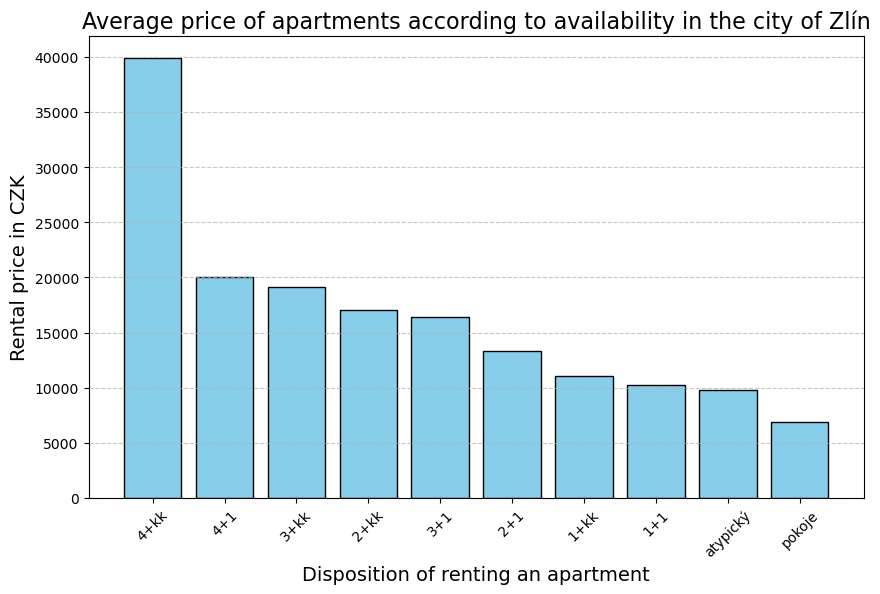

In [4]:
prumerna_cena = df.groupby('Rozměry bytu')['Čistá cena'].mean().round(2).reset_index()
prumerna_cena_sorted = prumerna_cena.sort_values('Čistá cena', ascending=False)

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(prumerna_cena_sorted['Rozměry bytu'], prumerna_cena_sorted['Čistá cena'], color='skyblue', edgecolor='black')
plt.title('Average price of apartments according to availability in the city of Zlín', fontsize=16)
plt.xlabel('Disposition of renting an apartment', fontsize=14)
plt.ylabel('Rental price in CZK', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Existuje ulice, kde je vyšší koncentrace dražších bytů? Varianta A)

In [5]:
ulice = df.groupby('Lokace')['Čistá cena'].agg(['max','count'])

def clean_data(ulice):
    # Seřadit podle sloupce: 'max' (sestupně)
    ulice = ulice.sort_values(['max'], ascending=[False])
    return ulice
ulice_clean = clean_data(ulice.copy())
ulice_clean.head()# Odpověď: Luhačovice

,max,count
Lokace,,
Luhačovice,39900,9
"třída Tomáše Bati, Zlín",29000,3
"Smetanova, Zlín",25000,3
"Na Honech I, Zlín",25000,1
"Lešetín I, Zlín",25000,2


Existuje ulice, kde je vyšší koncentrace dražších bytů? Varianta B)


In [6]:

# Seskupení podle 'Lokace' a výpočet agregovaných hodnot
lokace_statistiky = df.groupby('Lokace')['Čistá cena'].agg(['mean', 'count', 'max']).round(2)

# Seřazení podle průměrné ceny (od nejdražší)
lokace_statistiky = lokace_statistiky.sort_values(by='max', ascending=False)

# Výpis lokalit s více než 2 byty a průměrnou cenou nad 20 000 Kč
drazsi_lokace = lokace_statistiky[(lokace_statistiky['max'] > 20000) & (lokace_statistiky['count'] > 2)]

print(f'Lokalita s nejvyšší koncentrací dražších bytů, dle zadaných parametrů více než 2 byty a průměrnou cenou nad 20 000 Kč je lokalita:')
drazsi_lokace


Lokalita s nejvyšší koncentrací dražších bytů, dle zadaných parametrů více než 2 byty a průměrnou cenou nad 20 000 Kč je lokalita:


,mean,count,max
Lokace,,,
Luhačovice,20877.78,9,39900
"třída Tomáše Bati, Zlín",15502.67,3,29000
"Smetanova, Zlín",19333.33,3,25000
"třída Svobody, Zlín - Malenovice",14897.50,4,20690


In [31]:
import plotly.express as px

drazsi_lokace = pd.DataFrame({
    "Lokalita": [
        "Luhačovice",
        "třída Tomáše Bati (Zlín)",
        "ulice Smetanova (Zlín)",
        "třída Svobody (Zlín-Malenovice)"
    ],
    "Průměrná cena (Kč)": [
        20877,
        15502.67,
        19333.33,
        14897.5
    ]
})

drazsi_lokace["Latitude"] = [49.1007, 49.2202, 49.2237, 49.2009]
drazsi_lokace["Longitude"] = [17.7592, 17.6659, 17.6689, 17.5898]

data_lokace = drazsi_lokace.copy()

fig = px.scatter_mapbox(
    data_lokace,
    lat="Latitude",
    lon="Longitude",
    size="Průměrná cena (Kč)",
    hover_name="Lokalita",
    title="Průměrná cena pronájmu v Kč",
    zoom=9,  # Upravte dle potřeby
    mapbox_style="open-street-map"
)

fig.show()

Jaký typ kompozice je v daném městě nejčastěji inzerovan?
Největší počet nabízených bytů je s rozlohou 45m2 (celkem 12 inzerovaných). 
Odpověď: Pravděpodobnou příčinou může být převis nabídky malometrážních bytů, které nejsou prioritní poptávkou rodin s dětmi. Alternativně může být vyšší poptávka po menších bytech od mladých lidí nebo jednotlivců.

In [17]:
kompo = df['Kompozice bytu'].value_counts().reset_index()
def categorize(kompo):
    if kompo < 45:
        return "Do 45 m²"
    elif 45 <= kompo <= 70:
        return "45-70 m²"
    else:
        return "Nad 70 m²"

kompo['Kategorie'] = kompo['Kompozice bytu'].apply(categorize)
kompo_final = kompo.groupby('Kategorie')['count'].sum()

print(kompo_final)

Kategorie
45-70 m²     70
Do 45 m²     46
Nad 70 m²    30
Name: count, dtype: int64


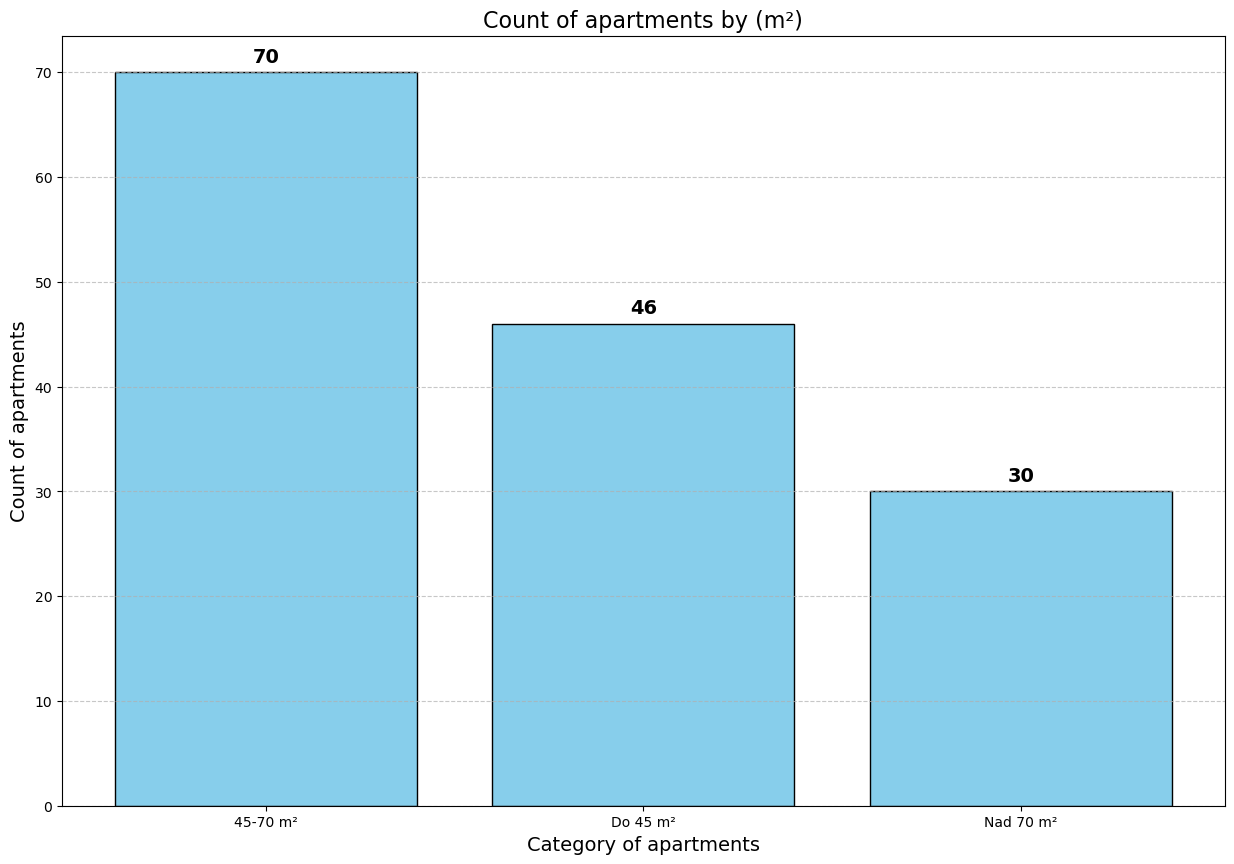

In [25]:
plt.figure(figsize=(15, 10))

plt.bar(kompo_final.index, kompo_final.values, color='skyblue', edgecolor='black')

# Přidání hodnot nad sloupce
for i, v in enumerate(kompo_final.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Category of apartments', fontsize=14)
plt.ylabel('Count of apartments', fontsize=14)
plt.title('Count of apartments by (m²)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

In [145]:
# Filtrace bytů s cenou vyšší než 20 000 Kč
byty_nad_20000 = df[df['Čistá cena'] > 20000]
# Zjištění, zda existují byty s dispozicemi 2+1 nebo 2+kk v této cenové hladině
dva_pokoje = byty_nad_20000[byty_nad_20000['Rozměry bytu'].isin(['2+1', '2+kk'])]

dva_pokoje

,Cena,Kompozice bytu,Rozměry bytu,Lokace,Čistá cena,Kategorie
7,25 000 Kč/měsíc,96,2+kk,"Lešetín I, Zlín",25000,Nad 70 m²
18,20 690 Kč/měsíc,64,2+kk,"třída Svobody, Zlín - Malenovice",20690,45-70 m²
19,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000,Nad 70 m²
36,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000,Nad 70 m²
57,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000,Nad 70 m²
99,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000,Nad 70 m²
113,25 000 Kč/měsíc,111,2+kk,"Smetanova, Zlín",25000,Nad 70 m²
128,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000,Nad 70 m²
136,23 000 Kč/měsíc,120,2+kk,"Nádražní, Luhačovice",23000,Nad 70 m²


Jaká je minimální a maximální cena inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?


In [128]:
min_max_inzerce = df.groupby('Rozměry bytu')['Čistá cena'].agg(['min','max'])
min_max_inzerce = min_max_inzerce.sort_values(['max'])

rozptyl = min_max_inzerce.assign(rozptyl=lambda x: x['max'] - x['min'])
rozptyl

,min,max,rozptyl
Rozměry bytu,,,
pokoje,3708,10500,6792
atypický,7500,12000,4500
1+1,4200,13500,9300
1+kk,6500,14900,8400
2+1,9000,16500,7500
3+1,11900,19000,7100
4+1,19000,21000,2000
2+kk,9000,25000,16000
3+kk,13000,29000,16000


Jaké je  minimální a maximální cena inzerce pro každou kompozici bytu? Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?


In [133]:
# Seskupení podle 'Rozměry bytu' a výpočet minimální, maximální ceny a rozptylu
kompozice_stat = (
    df.groupby('Rozměry bytu')['Čistá cena']
    .agg(['min', 'max'])  # Výpočet minimální a maximální ceny
    .assign(rozptyl=lambda x: x['max'] - x['min'])  # Přidání sloupce pro rozptyl
)

nejvetsi_rozptyl = kompozice_stat[kompozice_stat['rozptyl'] == kompozice_stat['rozptyl'].max()]
print("Kompozice bytů s největším rozptylem:")
print(nejvetsi_rozptyl)

Kompozice bytů s největším rozptylem:
                min    max  rozptyl
Rozměry bytu                       
2+kk           9000  25000    16000
3+kk          13000  29000    16000
